Use the read_text_file function from io.py to read in the 137 positive Rap1 motif examples.
Use the read_fasta_file function from io.py to read in all the negative examples. Note that these sequences are much longer than the positive sequences, so you will need to process them to the same length.
Balance your classes using your sample_seq function and explain why you chose the sampling scheme you did.
One-hot encode the data using your one_hot_encode_seqs function.
Split the data into training and validation sets.
Generate an instance of your NeuralNetwork class with an appropriate architecture.
Train your neural network on the training data.
Plot your training and validation loss by epoch.
Report the accuracy of your classifier on your validation dataset.
Explain your choice of loss function and hyperparameters.


In [1]:
#imports
import sklearn
import numpy as np
import pandas as pd
from nn.nn import NeuralNetwork as nn
from nn.nn_alt import NeuralNetwork as nnalt
from sklearn.preprocessing import StandardScaler
from nn.preprocess import sample_seqs, one_hot_encode_seqs 
from nn.io import read_text_file, read_fasta_file 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
#read in samples 

#read in the positive samples
positive_samples = read_text_file("data/rap1-lieb-positives.txt")

#read in the negative samples
negative_samples = read_fasta_file("data/yeast-upstream-1k-negative.fa")



In [3]:
#trim the negative samples to the same length as the positive samples
negative_samples = [sample[:len(positive_samples[0])] for sample in negative_samples]


In [4]:
#turn dataset into list of sequences and labels

#combine the positive and negative samples into a single list
samples = positive_samples + negative_samples

#generate labels for the samples
labels = [1]*len(positive_samples) + [0]*len(negative_samples)


In [5]:
#balance classes (imbalanced data set)
sample_seqs, sample_labels = sample_seqs(samples, labels)

#why did I choose this sampling technique?
#sampling with replacement aka bootstrapping allows me to have a balanced dataset with the same number of positive and negative samples
#I chose this as a simple and straightforward way to balance the dataset, without having to remove any samples


In [6]:
#one hot encode the sequences
one_hot_seqs = one_hot_encode_seqs(sample_seqs)

In [7]:
#split the data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(one_hot_seqs, sample_labels, test_size=0.2, random_state=42)


In [8]:
#convert the data to numpy arrays
X_train = np.array(X_train)
X_val = np.array(X_val)
y_train = np.array(y_train)
y_val = np.array(y_val)


#reshaoe to have same second dimension as X_train and X_val
y_train = y_train.reshape(-1,1)
y_val = y_val.reshape(-1,1)




In [9]:
#generate instance of neural network

#create desired architecture

nn_arch = [
    {"input_dim": 68, "output_dim": 16, "activation": "relu"},  # encoder
    {"input_dim": 16, "output_dim": 1, "activation": "sigmoid"}  # decoder
]


#initialize nn
classifier = nn(
    nn_arch=nn_arch,
    lr=0.01,           # learning rate
    seed=42,            # random seed
    batch_size=32,      # batch size
    epochs=6,         # number of epochs
    loss_function= 'binary_cross_entropy' # loss function 
)


In [10]:
#train neural network
loss_train, loss_val = classifier.fit(X_train, y_train, X_val, y_val)



shapes in forward pass, before calling single forward pass:
X shape: (32, 68) # (batch_size, feature_num)
current A_prev, right before single pass call 1
A_prev shape: (32, 68) # (batch_size, feature_num)
shapes in single forward pass, W_curr, A_prev, b_curr
W_curr shape: (16, 68) # (output_neuron, features/input neuron)
A_prev shape: (32, 68) # (batch_size, feature_num/input neuron)
b_curr shape: (16, 1) # (output_neuron, )
shapes in single forward pass, after Z_curr calc, before activation func, Z_curr
Z_curr shape: (32, 16) # (batch_size, output_neuron)
shapes in single forward pass, after Z_curr calc, and activation func, Z_curr, A_curr
Z_curr shape: (32, 16) # (batch_size, output_neuron)
A_curr shape: (32, 16) # (batch_size, output_neuron)
shapes in forward pass, after calling single forward pass, A, Z
A shape: (32, 16) # (batch_size, output_neuron)
Z shape: (32, 16) # (batch_size, output_neuron)
current A_prev, right before single pass call 2
A_prev shape: (32, 16) # (batch_size,

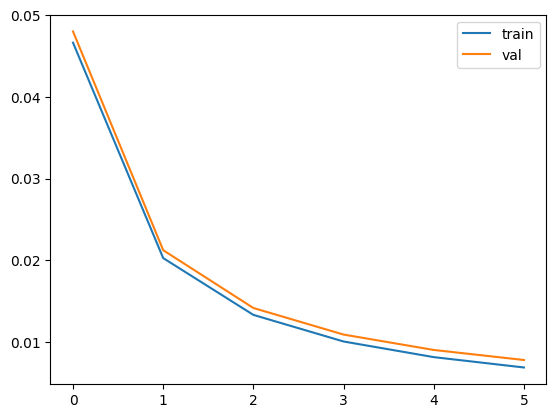

In [11]:
#plot training and validation loss by epoch

plt.plot(loss_train, label="train")
plt.plot(loss_val, label="val")
plt.legend()
plt.show()



In [12]:
#report the accuracy of the model on the validation set

val_prediction = classifier.predict(X_val)
val_accuracy = np.mean(np.round(val_prediction) == y_val)
print(f"Accuracy on validation set: {val_accuracy}")

shapes in forward pass, before calling single forward pass:
X shape: (1266, 68) # (batch_size, feature_num)
current A_prev, right before single pass call 1
A_prev shape: (1266, 68) # (batch_size, feature_num)
shapes in single forward pass, W_curr, A_prev, b_curr
W_curr shape: (16, 68) # (output_neuron, features/input neuron)
A_prev shape: (1266, 68) # (batch_size, feature_num/input neuron)
b_curr shape: (16, 1) # (output_neuron, )
shapes in single forward pass, after Z_curr calc, before activation func, Z_curr
Z_curr shape: (1266, 16) # (batch_size, output_neuron)
shapes in single forward pass, after Z_curr calc, and activation func, Z_curr, A_curr
Z_curr shape: (1266, 16) # (batch_size, output_neuron)
A_curr shape: (1266, 16) # (batch_size, output_neuron)
shapes in forward pass, after calling single forward pass, A, Z
A shape: (1266, 16) # (batch_size, output_neuron)
Z shape: (1266, 16) # (batch_size, output_neuron)
current A_prev, right before single pass call 2
A_prev shape: (1266, 

#explain your choice of loss function and hyperparameters
I chose the sigmoid activation function for the output layer as it is a binary classification problem, and sigmoid will ensure nn returns a prediction between 0 and 1.
I tested a few different learning rates (.1, .01,.001) and decided to continue with .01,  which gave me a very high accuracy 
I tested a handful of different epoch numbers, and 6 seems to be enough, the loss plateaus around epoch 4
I started with a batch size of 32 and it worked great, I tested a higher batch size but it didn't make much of an impact. 
My accuracy was good enough to leave the paramaters as they were at this point.




